Eq(x(t), C1 + C2*t + t**2/(2*r**2))
-1.0
1.0
Time's up!
x:  [-2.8545640117135647, 1.002110012370286, -2.8613002315620264, 1.0026366844753698]
x_dot:  [-0.00014809362288617045, 1.5288880238614793e-06, -0.00014475907566351593, -3.372771372126419e-06]


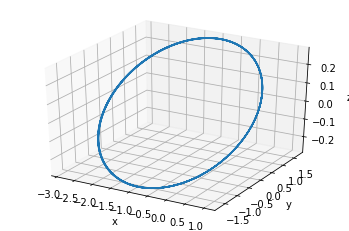

Text(0.5, 1.0, 'Poincare section y = 0')

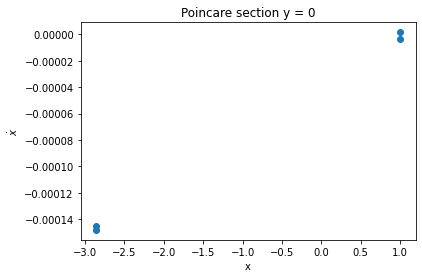

In [14]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from sympy import Derivative,Function,dsolve
from sympy.abc import t,r
from sympy.tensor.array import derive_by_array
from mpl_toolkits import mplot3d


x=Function('x')(t)
g=dsolve(Derivative(x,(t,2))-1/(r**2),func=x)
print(g)

#%%


def r(x,y,z):
    return (x**2+y**2+z**2)**(1/2)
def v(vx,vy,vz):
    return (vx**2+vy**2+vz**2)**(1/2)

def acc(x,y,z):
    ax=-x/((x**2+y**2+z**2)**(3/2))
    ay=-y/((x**2+y**2+z**2)**(3/2))
    az=-z/((x**2+y**2+z**2)**(3/2))
    return ax,ay,az

def pos(x,y,z,vx,vy,vz,ax,ay,az):
    x+=vx*h
    y+=vy*h
    z+=vz*h
    vx+=ax*h
    vy+=ay*h
    vz+=az*h
    a=acc(x,y,z)
    ax=a[0]
    ay=a[1]
    az=a[2]
    return x,y,z,vx,vy,vz,ax,ay,az
#%%
h=0.0001
x=1
y=0
z=0
vx=0
vy=1.2
vz=0.2
ax,ay,az=acc(x,y,z)
print(ax)
position=pos(x,y,z,vx,vy,vz,ax,ay,az)
print(position[0])
x2=[x]
y2=[y]
z2=[z]
vx2=[vx]
vy2=[vy]
vz2=[vz]
ax2=[ax]
ay2=[ay]
az2=[az]
t=0
bo=1

map_x = []
map_x_dot = []
while bo==1:
    position=pos(x,y,z,vx,vy,vz,ax,ay,az)
    x2.append(position[0])
    x=position[0]
    y2.append(position[1])
    y=position[1]
    z2.append(position[2])
    z=position[2]
    vx2.append(position[3])
    vx=position[3]
    vy2.append(position[4])
    vy=position[4]
    vz2.append(position[5])
    vz=position[5]
    ax2.append(position[6])
    ax=position[6]
    ay2.append(position[7])
    ay=position[7]
    az2.append(position[8])
    az=position[8]
    t+=h
    if (x**2+y**2+z**2)<0.01:
        print("Boom")
        bo=2
    if t>100:
        print("Time's up!")
        bo=2
    if abs(position[1]) <= 1e-5:
        map_x.append(position[0])
        map_x_dot.append(position[3])
        
        
print("x: ", map_x)
print("x_dot: ",map_x_dot)

ax = plt.axes(projection='3d')
ax.plot3D(x2,y2,z2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

#plt.plot(x2,vx2)
plt.scatter(map_x,map_x_dot)
plt.xlabel("x")
plt.ylabel(r"$\dot{x}$")
plt.title("Poincare section y = 0")
